In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc

# Display matplotlib animations as HTML5 videos
rc('animation', html='html5')

In [2]:
# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [3]:
def colorizer(x, y):
    """
        Map x-y coordinates to a unique rgb color
    """
    r = min(1, 1 - y/3)
    g = min(1, 1 + y/3)
    b = 1/4 + x/16
    return r, g, b

In [4]:
# Map grid coordinates to colors. Done only for xygrid, not all grids.
colors = list(map(colorizer, xygrid[0], xygrid[1]))

In [5]:
# Apply linear transform by the new basis vectors u, v = (2, 1), (-1, 1). I.e, the matrix [[2, -1], [1, 1]]
A = np.column_stack([[2, 1], [-1, 1]])
print(A)
uvgrid = A @ xygrid  # @ is matrix multiply, * is elementwise multiplication, with broadcasting.

[[ 2 -1]
 [ 1  1]]


In [6]:
def plot_grid(grid):
    """
        Plots a grid on the x-y plane. Useful for showing transformations
    """
    # Plot grid points 
    plt.figure(figsize=(4, 4), facecolor="w")
    plt.scatter(grid[0], grid[1], s=36, c=colors, edgecolor="none")

    # Set axis limits
    plt.grid(False)
    plt.axis("equal")
    plt.show()

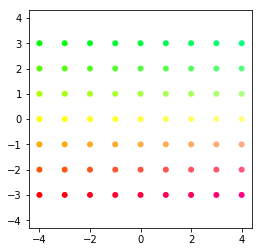

In [7]:
plot_grid(xygrid)

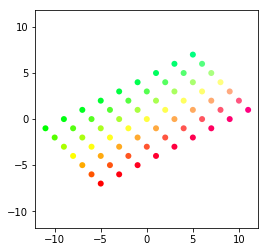

In [8]:
plot_grid(uvgrid)

In [9]:
def stepwise_transform(A, grid, num_steps):
    """
        Returns a list of transformed grids, stepping from the given grid to the grid A @ grid.
    """
    # create empty array of the right size
    transgrid = np.zeros((num_steps + 1, ) + np.shape(grid))
    # compute intermediate transforms
    for i in range(num_steps + 1):
        intermediate = np.eye(2) + i / num_steps * (A - np.eye(2))
        # apply intermediate matrix transformation
        transgrid[i] = intermediate @ grid
    return transgrid

In [10]:
steps = 50
transform = stepwise_transform(A, xygrid, steps)

In [11]:
def animate_transform(A, grid=None, num_steps=50, repeat=False):
    """
        Animates the effect a transform has on a given grid. If no grid is given, one will be generated.
        
        You can expect a small delay while the function generates the animation.
    """
    if grid is None:
        # Create a grid of points in x-y space 
        xvals = np.linspace(-4, 4, 9)
        yvals = np.linspace(-3, 3, 7)
        grid = np.column_stack([[x, y] for x in xvals for y in yvals])

    # Map grid coordinates to colors. Done only for xygrid, not all grids.
    colors = list(map(colorizer, grid[0], grid[1]))
    intermediate_transforms = stepwise_transform(A, grid, num_steps)
    fig = plt.figure(figsize=(6, 6))

    xmin = min(min(grid[0]), min(intermediate_transforms[-1][0]))
    xmax = max(max(grid[0]), max(intermediate_transforms[-1][0]))
    ymin = min(min(grid[1]), min(intermediate_transforms[-1][1]))
    ymax = max(max(grid[1]), max(intermediate_transforms[-1][1]))

    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    scatter = ax.scatter([], [], c=colors)
    # Prevent `%matplotlib inline` from displaying the above scatter plot.
    plt.close()

    def update(i):
        """Draws the ith intermediate transform"""
        scatter.set_offsets(intermediate_transforms[i].T)
        return scatter,

    return animation.FuncAnimation(fig, update, interval=50, frames=num_steps, blit=True, repeat=repeat)

In [12]:
anim = animate_transform(A, repeat=False)
# anim.save('test.mp4')
anim

In [13]:
A = np.column_stack([[1, 0], [2, 1]])
anim = animate_transform(A, repeat=True)
anim.save('shear.mp4')
anim

In [14]:
A = np.column_stack([[1, 0], [0, 0]])
anim = animate_transform(A, repeat=True)
anim.save('projection.mp4')
anim

In [15]:
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
anim = animate_transform(A, repeat=True)
anim.save('rotation.mp4')
anim

In [22]:
A = np.column_stack([[0, 1], [1, 0]])
anim = animate_transform(A, repeat=True)
anim.save('permutation.mp4')
anim

In [26]:
B = np.matrix([[1, 2], [3, 4]])
A @ B

matrix([[3, 4],
        [1, 2]])

In [17]:
A = np.column_stack([[2, 0], [0, 5]])
anim = animate_transform(A, repeat=True)
anim.save('scale.mp4')
anim

In [18]:
theta = np.pi / 6 # 30 degree clockwise rotation
A = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
B = np.column_stack([[2, 0], [0, 1]])
anim = animate_transform(A @ B, repeat=True)
anim.save('combination.mp4')
anim

In [19]:
animate_transform(B @ A, repeat=True)